In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
pd.DataFrame(digits.data).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


<Figure size 640x480 with 0 Axes>

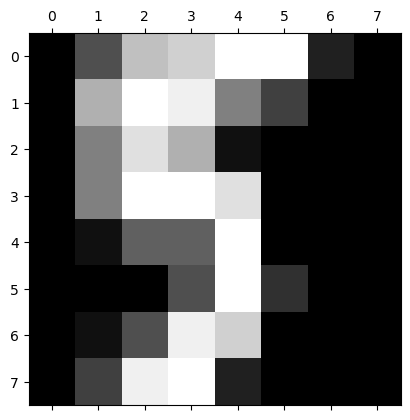

target digit: 5


In [5]:
plt.gray()
index = 15
plt.matshow(digits.images[index])
plt.show()
print('target digit:', digits.target[index])

In [6]:
from sklearn.model_selection import train_test_split
x = digits.data
y = digits.target
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
print(len(xtrain), len(xtest))
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', multi_class='auto', max_iter=1000)
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))
failed_list = []
for i in range(len(xtest)):
    if model.predict([xtest[i]]) != ytest[i]:
        failed_list.append(i)
print('failed_list:', failed_list)

1437 360
0.9611111111111111
failed_list: [11, 133, 149, 159, 164, 169, 193, 222, 239, 244, 249, 270, 339, 346]


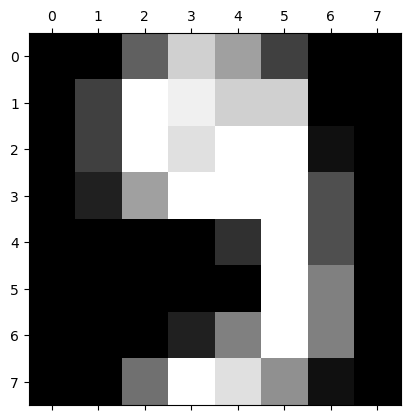

(array([9]), 9, 0.9994818441722811)

In [7]:
index = 149
plt.matshow(digits.images[index])
plt.show()
model.predict([digits.data[index]]), digits.target[index], model.predict_proba([digits.data[index]]).item(digits.target[index])

In [8]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=7)
model2.fit(xtrain, ytrain)
print(model2.score(xtest, ytest))
for i in range(len(xtest)):
    x = xtest[i]
    x = x.reshape(1, -1)
    y = model2.predict(x)
    if y != ytest[i]:
        print(i, y, ytest[i])


0.9888888888888889
133 [9] 7
159 [4] 9
249 [5] 9
339 [6] 5


In [15]:
xtrain[0].reshape(8,8)

array([[ 0.,  0.,  3., 14.,  1.,  0.,  0.,  0.],
       [ 0.,  0., 12., 12.,  0.,  0.,  0.,  0.],
       [ 0.,  3., 16.,  6.,  0.,  0.,  0.,  0.],
       [ 0.,  5., 16.,  2.,  0.,  0.,  0.,  0.],
       [ 0.,  6., 16.,  2.,  5.,  2.,  0.,  0.],
       [ 0.,  4., 16.,  2., 12., 15.,  2.,  0.],
       [ 0.,  1., 14., 13.,  2., 13., 11.,  0.],
       [ 0.,  0.,  3., 11., 16., 13.,  4.,  0.]])

In [17]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

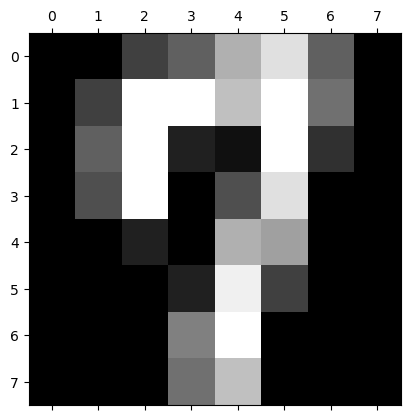

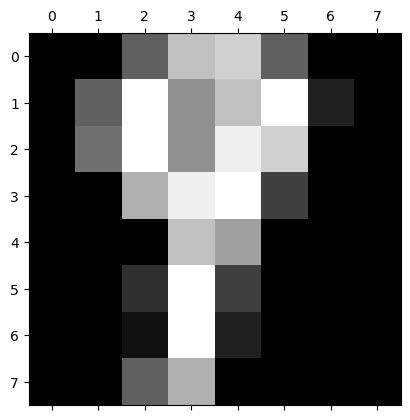

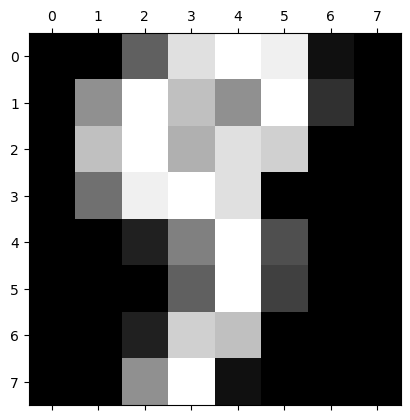

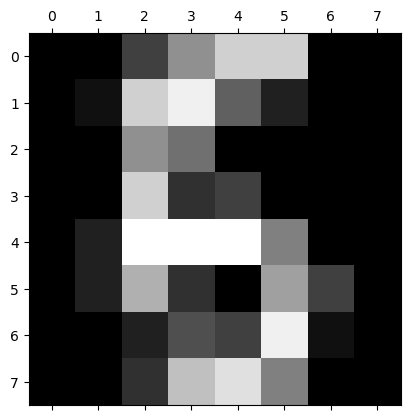

In [23]:
plt.gray()
plt.matshow(xtest[133].reshape(8,8))
plt.matshow(xtest[159].reshape(8,8))
plt.matshow(xtest[249].reshape(8,8))
plt.matshow(xtest[339].reshape(8,8))
plt.show()

In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, model.predict(xtest))
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 27,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 44,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 45,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0, 28,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  4, 36]], dtype=int64)

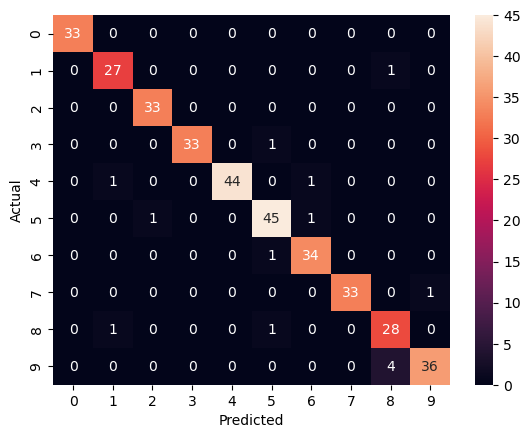

In [24]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()